In [1]:
# initialize dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp

In [2]:
from sklearn.cluster import KMeans

In [3]:
%matplotlib inline

In [4]:
# Read heart.csv file
df = pd.read_csv('heart.csv')

In [5]:
# see tables
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# check datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Description of the data in the DataFrame
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
# check null values
df.isnull().any().any()

False

In [9]:
# check duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [10]:
# feature selection
features= ['Age', 'RestingBP']

C:\Users\didul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


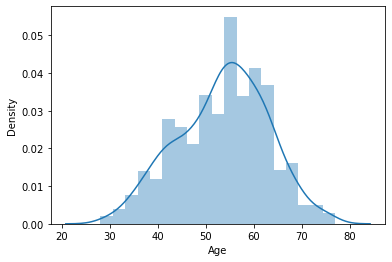

C:\Users\didul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


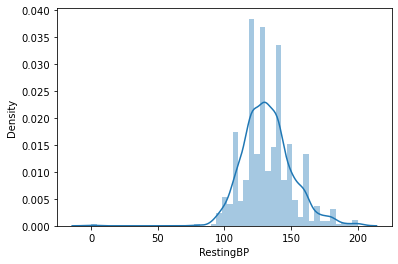

In [11]:
# Show data using seaborn
import seaborn as sb
# plt.style.use('fivethirtyeight')
for feature in features:
    sb.distplot(df[feature])
    mtp.show()

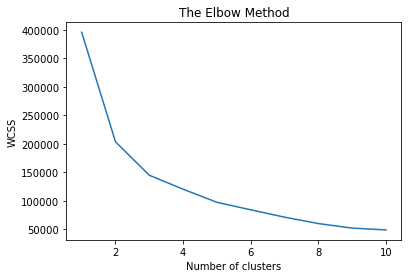

In [12]:
# Application of Elbow method to find optimal number of clusters

# Assigning features we are selecting for the clustering toa varable
x = df.iloc[:, [0, 3]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
mtp.plot(range(1, 11), wcss)
mtp.title('The Elbow Method')
mtp.xlabel('Number of clusters')
mtp.ylabel('WCSS')
mtp.show()

Method 1 - K Mean clustering

In [13]:
# Fitting K-Means to the dataset and centroids declared
# initialize the centroids
np.random.seed(200)
k = 3
center_point_obj = {
    i+1: [np.random.randint(0, 90), np.random.randint(0, 250)]
    for i in range(k)
}

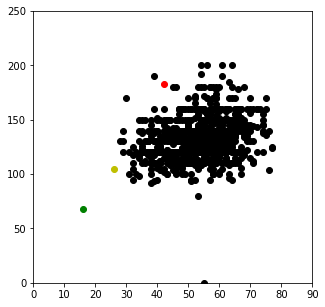

In [14]:
# datashow using scatter plot
fig = mtp.figure(figsize=(5,5))

mtp.scatter(df['Age'], df['RestingBP'], color='k')
colmap = {1: 'y', 2: 'g', 3: 'r'}

for i in center_point_obj.keys():
  mtp.scatter(*center_point_obj[i], color=colmap[i])

mtp.xlim(0, 90)
mtp.ylim(0, 250)
mtp.show()

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  distance_form_1  \
0              N      0.0       Up             0        37.696154   
1              N      1.0     Flat             1        59.615434   
2              N      0.0       Up             0        27.313001   
3              Y      1.5     Flat             1        39.661064   
4              N      0.0       Up             0        53.000000   

   distance_form_2  distance_form_3  closest color  
0        75.894664        43.046487        1 

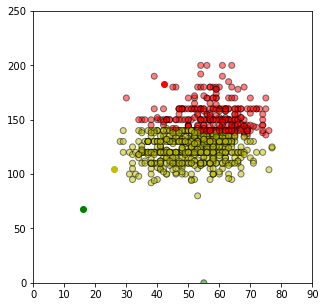

In [15]:
# Assigninig value to each cluster
def assignClusterValues(df, center_point_obj):
  for i in center_point_obj.keys():
    # sqrt((x1-x2)^2 - (y1-y2)^2)
    df['distance_form_{}'.format(i)] = (
        np.sqrt(
            (df['Age'] - center_point_obj[i][0]) ** 2 + (df['RestingBP'] - center_point_obj[i][1]) ** 2
        )
    )

# closest centroid to each data point
  centroid_distance_columns = ['distance_form_{}'.format(i) for i in center_point_obj.keys()]
  df['closest'] = df.loc[:, centroid_distance_columns].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_form_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

df = assignClusterValues(df, center_point_obj)
print(df.head())

# show the scatter plot
fig = mtp.figure(figsize=(5, 5))
mtp.scatter(df['Age'], df['RestingBP'], color=df['color'], alpha=0.5, edgecolor='k')
for i in center_point_obj.keys():
  mtp.scatter(*center_point_obj[i], color=colmap[i])
mtp.xlim(0, 90)
mtp.ylim(0, 250)
mtp.show()

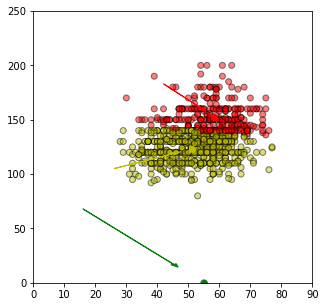

In [18]:
# update centroids
import copy

# get copy of centroids
old_centroids = copy.deepcopy(center_point_obj)

# update centroids
def updateCentroids(k):
  for i in center_point_obj.keys():
    center_point_obj[i][0] = np.mean(df[df['closest'] == i]['Age'])
    center_point_obj[i][1] = np.mean(df[df['closest'] == i]['RestingBP'])
  return k

center_point_obj = updateCentroids(center_point_obj)

fig = mtp.figure(figsize=(5, 5))
ax = mtp.axes()
mtp.scatter(df['Age'], df['RestingBP'], color=df['color'], alpha=0.5, edgecolor='k')

for i in center_point_obj.keys():
  mtp.scatter(*center_point_obj[i], color=colmap[i])

mtp.xlim(0, 90)
mtp.ylim(0, 250)

# dx, dy 
for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx = (center_point_obj[i][0] - old_centroids[i][0]) * 0.75
  dy = (center_point_obj[i][1] - old_centroids[i][1]) * 0.75
  ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])

mtp.show()

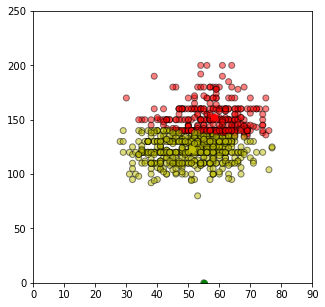

In [19]:
# repeat assignment stage
df = assignClusterValues(df, center_point_obj)

# plot results
fig = mtp.figure(figsize=(5, 5))
mtp.scatter(df['Age'], df['RestingBP'], color=df['color'], alpha=0.5, edgecolor='k')
for i in center_point_obj.keys():
  mtp.scatter(*center_point_obj[i], color=colmap[i])
mtp.xlim(0, 90)
mtp.ylim(0, 250)
mtp.show()

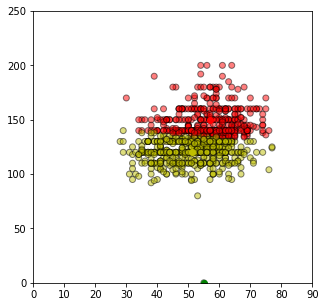

In [21]:
# continue untill all assigned categories don't change any more
while True:
  closest_centroids = df['closest'].copy(deep=True)
  center_point_obj = updateCentroids(center_point_obj)
  df = assignClusterValues(df, center_point_obj)
  if closest_centroids.equals(df['closest']):
    break

fig = mtp.figure(figsize=(5, 5))
mtp.scatter(df['Age'], df['RestingBP'], color=df['color'], alpha=0.5, edgecolor='k')
for i in center_point_obj.keys():
  mtp.scatter(*center_point_obj[i], color=colmap[i])
mtp.xlim(0, 90)
mtp.ylim(0, 250)
mtp.show()

In [22]:
# column selection for the dataframe
column1 = df.iloc[:, 0].values
column4 = df.iloc[:, 3].values

# selectedFeatures = df.iloc[:, [column1, column4]].values
selectedFeatures = np.array([column1, column4]).T

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
# store values of x and y cordinates variables
kmeans.fit(selectedFeatures)

KMeans(n_clusters=3)

In [24]:
labels = kmeans.predict(selectedFeatures)
center_point_obj = kmeans.cluster_centers_

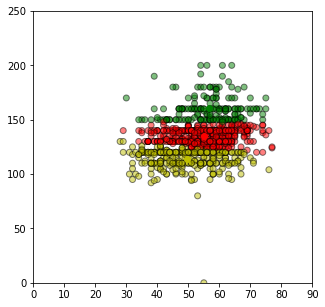

In [26]:
fig = mtp.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)

# creating scatter plot and passing x and y arrays into dataframe
                              # colors also 3
mtp.scatter(df['Age'], df['RestingBP'], color=colors1, alpha=0.5, edgecolor='k')

for idx, center_point_obj in enumerate(center_point_obj):
  mtp.scatter(*center_point_obj, color=colmap[idx+1])

mtp.xlim(0, 90)
mtp.ylim(0, 250)
mtp.show()

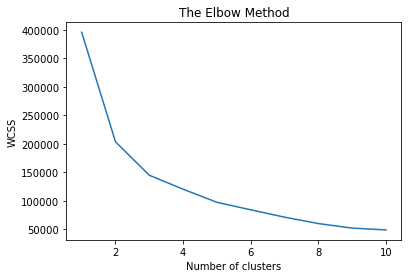

In [27]:
# do elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(selectedFeatures)
    wcss.append(kmeans.inertia_)

# plot the elbow method
mtp.plot(range(1, 11), wcss)
mtp.title('The Elbow Method')
mtp.xlabel('Number of clusters')
mtp.ylabel('WCSS')
mtp.show()

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
# silhouette_avg = []
# for num_clusters in range_n_clusters:
 
#  # initialise kmeans
#  kmeans = KMeans(n_clusters=num_clusters)
#  kmeans.fit(AgeRest)
#  cluster_labels = kmeans.labels_
 
#  # silhouette score
# silhouette_avg.append(silhouette_score(AgeRest, cluster_labels))
# plt.plot(range_n_clusters,silhouette_avg,'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()

In [30]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 0)  
y_predict= kmeans.fit_predict(selectedFeatures)  

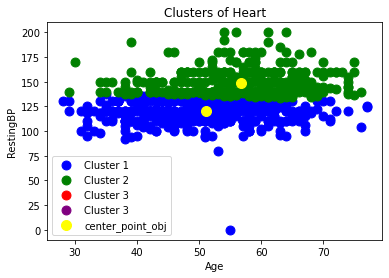

In [34]:
#visulaizing the clusters  
mtp.scatter(selectedFeatures[y_predict == 0, 0], selectedFeatures[y_predict == 0, 1], s = 80, c = 'blue', label = 'Cluster 1')
mtp.scatter(selectedFeatures[y_predict == 1, 0], selectedFeatures[y_predict == 1, 1], s = 80, c = 'green', label = 'Cluster 2')  
mtp.scatter(selectedFeatures[y_predict== 2, 0], selectedFeatures[y_predict == 2, 1], s = 80, c = 'red', label = 'Cluster 3') 
mtp.scatter(selectedFeatures[y_predict== 3, 0], selectedFeatures[y_predict == 3, 1], s = 80, c = 'purple', label = 'Cluster 3') 
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'center_point_obj')   
mtp.title('Clusters of Heart')  
mtp.xlabel('Age')  
mtp.ylabel('RestingBP')  
mtp.legend()  
mtp.show()  

From loan prediction

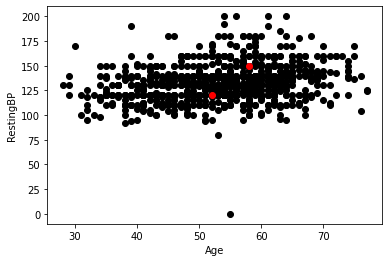

In [35]:
# From loan prediction
X = df[["RestingBP","Age"]]
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=2
# Select random observation as centroids
center_point_obj = (X.sample(n=K))
mtp.scatter(X["Age"],X["RestingBP"],c='black')
mtp.scatter(center_point_obj["Age"],center_point_obj["RestingBP"],c='red')
mtp.xlabel('Age')
mtp.ylabel('RestingBP')
mtp.show()

we are stopping the training when the centroids are not changing after two iterations

In [39]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in center_point_obj.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Age"]-row_d["Age"])**2
            d2=(row_c["RestingBP"]-row_d["RestingBP"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["RestingBP","Age"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['RestingBP'] - center_point_obj['RestingBP']).sum() + (Centroids_new['Age'] - center_point_obj['Age']).sum()
        print(diff.sum())
    center_point_obj = X.groupby(["Cluster"]).mean()[["RestingBP","Age"]]

C:\Users\didul\AppData\Local\Temp/ipykernel_10624/3298615004.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\didul\AppData\Local\Temp/ipykernel_10624/3298615004.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


-0.33071541816327255
-0.08642581506668279
0.0


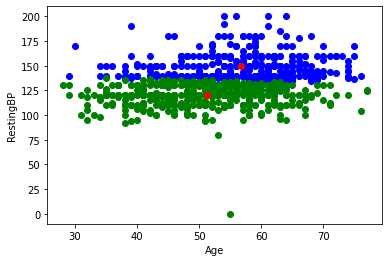

In [40]:
# delclare colors for each cluster
color=['blue','green']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    mtp.scatter(data["Age"],data["RestingBP"],c=color[k])
mtp.scatter(center_point_obj["Age"],center_point_obj["RestingBP"],c='red')
mtp.xlabel('Age')
mtp.ylabel('RestingBP')
mtp.show()

In [41]:
# declare features
features= ['Age', 'RestingBP']

In [42]:
# correlation matrix
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,distance_form_1,distance_form_2,distance_form_3,closest
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.222843,0.244599,-0.321467,0.303355
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.678307,0.999666,-0.679971,0.759006
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.010362,0.101748,-0.122057,0.060282
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.097255,0.068239,-0.034513,0.055136
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.091072,-0.106802,0.120326,-0.113305
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.149308,0.162561,-0.165258,0.195579
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.134843,0.104646,-0.089095,0.135760
distance_form_1,0.222843,0.678307,-0.010362,0.097255,-0.091072,0.149308,0.134843,1.000000,0.683832,-0.110361,0.680526
distance_form_2,0.244599,0.999666,0.101748,0.068239,-0.106802,0.162561,0.104646,0.683832,1.000000,-0.673641,0.758522
distance_form_3,-0.321467,-0.679971,-0.122057,-0.034513,0.120326,-0.165258,-0.089095,-0.110361,-0.673641,1.000000,-0.643495


In [43]:
# from sklearn import datasets
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# km = KMeans(random_state=42)
# visualizer = KElbowVisualizer(km, k=(2,10))

# visualizer.fit(X)
# visualizer.show()

In [44]:
# VarianceThreshold 
from sklearn.feature_selection import VarianceThreshold

X = df.iloc[:, [3,5]].values

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
v_threshold.get_support()

array([ True,  True])

In [45]:
#  return the mean absolute deviation of the values for the axises
df.mad()

Age                 7.613454
RestingBP          14.104157
Cholesterol        82.437609
FastingBS           0.357545
MaxHR              20.985533
Oldpeak             0.877876
HeartDisease        0.494302
distance_form_1     9.926762
distance_form_2    14.034330
distance_form_3    10.281824
closest             0.969100
dtype: float64